In [100]:
import requests
import json
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.graph_objs as go

In [158]:
df = pd.read_csv("AAPL_new.csv")
df

,Date,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
0,1999-11-01,80.00,80.6900,77.37,77.62,0.589041,2487300,0.0,1.0
1,1999-11-02,78.00,81.6900,77.31,80.25,0.608999,3564600,0.0,1.0
2,1999-11-03,81.62,83.2500,81.00,81.50,0.618485,2932700,0.0,1.0
3,1999-11-04,82.06,85.3700,80.62,83.62,0.634574,3384700,0.0,1.0
4,1999-11-05,84.62,88.3700,84.00,88.31,0.670165,3721500,0.0,1.0
...,...,...,...,...,...,...,...,...,...
5882,2023-03-20,155.07,157.8200,154.15,157.40,157.400000,73641415,0.0,1.0
5883,2023-03-21,157.32,159.4000,156.54,159.28,159.280000,73938285,0.0,1.0
5884,2023-03-22,159.30,162.1400,157.81,157.83,157.830000,75701811,0.0,1.0
5885,2023-03-23,158.83,161.5501,157.68,158.93,158.930000,67622060,0.0,1.0


In [159]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [160]:
df = df[['close']]
df

,close
Date,
1999-11-01,77.62
1999-11-02,80.25
1999-11-03,81.50
1999-11-04,83.62
1999-11-05,88.31
...,...
2023-03-20,157.40
2023-03-21,159.28
2023-03-22,157.83


In [161]:
anomalies = pd.read_csv("anomalies.csv")
#anomalies

In [162]:
df_new = df.copy()

In [163]:
anomalies = anomalies.set_index('Date')

In [164]:
anomalies

,close
Date,
2020-08-05,440.250
2020-08-06,455.610
2020-08-07,444.450
2020-08-10,450.910
2020-08-11,437.500
2020-08-12,452.040
2020-08-13,460.040
2020-08-14,459.630
2020-08-17,458.430


In [165]:
df_new = df_new.drop(df_new.index[:1000])
df_new

,close
Date,
2003-10-24,22.60
2003-10-27,22.60
2003-10-28,23.72
2003-10-29,23.69
2003-10-30,23.09
...,...
2023-03-20,157.40
2023-03-21,159.28
2023-03-22,157.83


In [166]:
anomaly_dates = anomalies.index.tolist()
#anomaly_dates

In [167]:
df_new.drop(anomaly_dates, inplace=True)

In [168]:
df_new

,close
Date,
2003-10-24,22.60
2003-10-27,22.60
2003-10-28,23.72
2003-10-29,23.69
2003-10-30,23.09
...,...
2023-03-20,157.40
2023-03-21,159.28
2023-03-22,157.83


In [169]:
df_new['ema_9'] = df_new['close'].ewm(9).mean().shift()
df_new['sma_7'] = df_new['close'].rolling(7).mean().shift()
df_new['sma_14'] = df_new['close'].rolling(14).mean().shift()
df_new['sma_21'] = df_new['close'].rolling(21).mean().shift()
df_new['sma_30'] = df_new['close'].rolling(30).mean().shift()

In [170]:
df_new

,close,ema_9,sma_7,sma_14,sma_21,sma_30
Date,,,,,,
2003-10-24,22.60,NaN,NaN,NaN,NaN,NaN
2003-10-27,22.60,22.600000,NaN,NaN,NaN,NaN
2003-10-28,23.72,22.600000,NaN,NaN,NaN,NaN
2003-10-29,23.69,23.013284,NaN,NaN,NaN,NaN
2003-10-30,23.09,23.210061,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2023-03-20,157.40,151.217924,152.284286,150.996429,150.553810,151.289667
2023-03-21,159.28,151.836131,153.257143,151.710000,150.729524,151.386333
2023-03-22,157.83,152.580518,154.797143,152.707857,151.050000,151.638000


In [171]:
fig = go.Figure()

# Add EMA and SMA lines
fig.add_trace(go.Scatter(x=df_new.index, y=df_new['ema_9'], name='EMA 9'))
fig.add_trace(go.Scatter(x=df_new.index, y=df_new['sma_7'], name='SMA 7'))
fig.add_trace(go.Scatter(x=df_new.index, y=df_new['sma_14'], name='SMA 14'))
fig.add_trace(go.Scatter(x=df_new.index, y=df_new['sma_21'], name='SMA 21'))
fig.add_trace(go.Scatter(x=df_new.index, y=df_new['sma_30'], name='SMA 30'))

# Add 'close' data with reduced opacity
fig.add_trace(go.Scatter(x=df_new.index, y=df_new['close'], name='close', opacity=0.2))

fig.show()

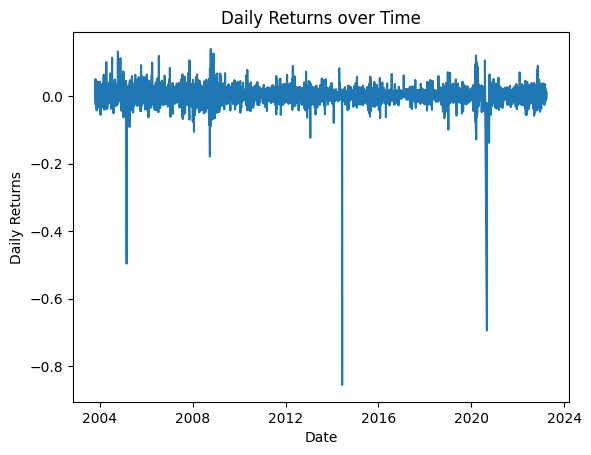

In [172]:
returns = df_new['close'].pct_change()
plt.plot(df_new.index, returns)
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.title('Daily Returns over Time')
plt.show()

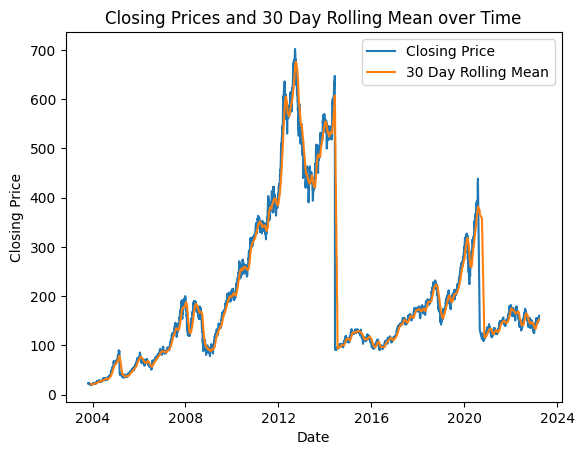

In [173]:
rolling_mean = df_new['close'].rolling(window=30).mean()
plt.plot(df_new.index, df_new['close'], label='Closing Price')
plt.plot(df_new.index, rolling_mean, label='30 Day Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Prices and 30 Day Rolling Mean over Time')
plt.legend()
plt.show()

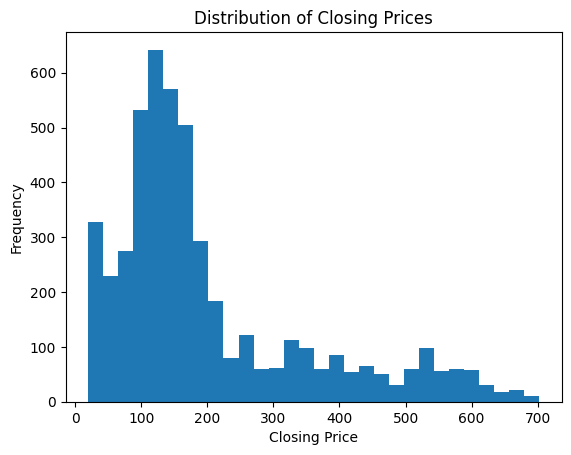

In [174]:
plt.hist(df_new['close'], bins=30)
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.title('Distribution of Closing Prices')
plt.show()

In [118]:
#import ta

In [175]:
def calculate_rsi(df, window_length=14):
    close_prices = df['close']
    delta = close_prices.diff()
    delta = delta[1:]
    gains = delta.copy()
    losses = delta.copy()
    gains[gains < 0] = 0
    losses[losses > 0] = 0
    avg_gain = gains.rolling(window_length).mean()
    avg_loss = losses.abs().rolling(window_length).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df_new['RSI'] = calculate_rsi(df_new).fillna(0)

In [176]:
def calculate_bollinger_bands(df, window_length=20, num_std=2):
    close_prices = df['close']
    rolling_mean = close_prices.rolling(window_length).mean()
    rolling_std = close_prices.rolling(window_length).std()
    upper_band = rolling_mean + (rolling_std * num_std)
    lower_band = rolling_mean - (rolling_std * num_std)
    return upper_band, lower_band

In [177]:
df_new['upper_band'], df_new['lower_band'] = calculate_bollinger_bands(df_new)

In [178]:
fig = go.Figure(go.Scatter(x=df_new.index, y=df_new.RSI, name='RSI'))
fig.show()

In [179]:
df_new['close'] = df_new['close'].shift(-1)

In [180]:
df_new = df_new[:-1]      # Because of shifting close price
df_new

,close,ema_9,sma_7,sma_14,sma_21,sma_30,RSI,upper_band,lower_band
Date,,,,,,,,,
2003-10-24,22.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-10-27,23.72,22.600000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
2003-10-28,23.69,22.600000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
2003-10-29,23.09,23.013284,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
2003-10-30,22.89,23.210061,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-03-17,157.40,150.797693,151.980000,150.490714,150.569524,151.150333,63.014706,156.413936,144.378064
2023-03-20,159.28,151.217924,152.284286,150.996429,150.553810,151.289667,67.170849,157.370420,143.906580
2023-03-21,157.83,151.836131,153.257143,151.710000,150.729524,151.386333,74.194666,158.848653,143.508347


In [181]:
df_new = df_new.reset_index()

# Rename the index column to 'Date'
df_new = df_new.rename(columns={'index': 'Date'})

# Show the updated DataFrame
print(df_new)

           Date   close       ema_9       sma_7      sma_14      sma_21  \
0    2003-10-24   22.60         NaN         NaN         NaN         NaN   
1    2003-10-27   23.72   22.600000         NaN         NaN         NaN   
2    2003-10-28   23.69   22.600000         NaN         NaN         NaN   
3    2003-10-29   23.09   23.013284         NaN         NaN         NaN   
4    2003-10-30   22.89   23.210061         NaN         NaN         NaN   
...         ...     ...         ...         ...         ...         ...   
4840 2023-03-17  157.40  150.797693  151.980000  150.490714  150.569524   
4841 2023-03-20  159.28  151.217924  152.284286  150.996429  150.553810   
4842 2023-03-21  157.83  151.836131  153.257143  151.710000  150.729524   
4843 2023-03-22  158.93  152.580518  154.797143  152.707857  151.050000   
4844 2023-03-23  160.25  153.105466  155.848571  153.559286  151.495238   

          sma_30        RSI  upper_band  lower_band  
0            NaN        NaN         NaN      

In [184]:
nan_indices = df_new[df_new['sma_30'].isna()].index

# Print the indices of rows with NaN values in 'SMA_30' column
print("Indices of rows with NaN values in 'SMA_30' column:")
print(nan_indices)

Indices of rows with NaN values in 'SMA_30' column:
Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
           dtype='int64')


In [185]:
df_new = df_new.iloc[30:]
df_new

,Date,close,ema_9,sma_7,sma_14,sma_21,sma_30,RSI,upper_band,lower_band
30,2003-12-08,20.45,21.259820,21.130000,20.882493,21.315471,21.843497,49.118904,22.392263,19.913227
31,2003-12-09,20.38,21.238005,21.177143,20.876779,21.216900,21.791830,50.452509,22.305270,19.855220
32,2003-12-10,21.21,21.156403,21.111429,20.879636,21.119281,21.720163,49.554678,22.265326,19.779164
33,2003-12-11,20.89,21.076287,20.921429,20.876786,21.046900,21.608830,57.929725,22.052257,19.880233
34,2003-12-12,20.17,21.090041,20.874286,20.936429,21.031186,21.526163,55.555556,21.732999,20.046491
...,...,...,...,...,...,...,...,...,...,...
4840,2023-03-17,157.40,150.797693,151.980000,150.490714,150.569524,151.150333,63.014706,156.413936,144.378064
4841,2023-03-20,159.28,151.217924,152.284286,150.996429,150.553810,151.289667,67.170849,157.370420,143.906580
4842,2023-03-21,157.83,151.836131,153.257143,151.710000,150.729524,151.386333,74.194666,158.848653,143.508347
4843,2023-03-22,158.93,152.580518,154.797143,152.707857,151.050000,151.638000,70.053836,159.762345,143.486655


In [186]:
test_size  = 0.10
valid_size = 0.10

test_split_idx  = int(df_new.shape[0] * (1-test_size))
valid_split_idx = int(df_new.shape[0] * (1-(valid_size+test_size)))

train_df  = df_new.loc[:valid_split_idx].copy()
valid_df  = df_new.loc[valid_split_idx+1:test_split_idx].copy()
test_df   = df_new.loc[test_split_idx+1:].copy()

fig = go.Figure()
fig.add_trace(go.Scatter(x=train_df.Date, y=train_df.close, name='Training'))
fig.add_trace(go.Scatter(x=valid_df.Date, y=valid_df.close, name='Validation'))
fig.add_trace(go.Scatter(x=test_df.Date,  y=test_df.close,  name='Test'))
fig.show()

In [187]:
drop_cols = ['Date']

train_df = train_df.drop(drop_cols, 1)
valid_df = valid_df.drop(drop_cols, 1)
test_df  = test_df.drop(drop_cols, 1)

<ipython-input-187-d3790e5eea6a>:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

<ipython-input-187-d3790e5eea6a>:4: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

<ipython-input-187-d3790e5eea6a>:5: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [188]:
y_train = train_df['close'].copy()
X_train = train_df.drop(['close'], 1)

y_valid = valid_df['close'].copy()
X_valid = valid_df.drop(['close'], 1)

y_test  = test_df['close'].copy()
X_test  = test_df.drop(['close'], 1)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3823 entries, 30 to 3852
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ema_9       3823 non-null   float64
 1   sma_7       3823 non-null   float64
 2   sma_14      3823 non-null   float64
 3   sma_21      3823 non-null   float64
 4   sma_30      3823 non-null   float64
 5   RSI         3823 non-null   float64
 6   upper_band  3823 non-null   float64
 7   lower_band  3823 non-null   float64
dtypes: float64(8)
memory usage: 239.1 KB


<ipython-input-188-2332f82c427f>:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

<ipython-input-188-2332f82c427f>:5: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

<ipython-input-188-2332f82c427f>:8: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [189]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import plot_importance, plot_tree


parameters = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.001, 0.005, 0.05],
    'max_depth': [8, 10],
    'gamma': [0.001, 0.005, 0.01],
    'random_state': [42]
}
model = xgb.XGBRegressor(objective='reg:squarederror')

# Perform grid search with cross-validation
clf = GridSearchCV(model, parameters)
clf.fit(X_train, y_train)

print(f'Best params: {clf.best_params_}')
print(f'Best validation score = {clf.best_score_}')

Best params: {'gamma': 0.001, 'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 100, 'random_state': 42}
Best validation score = -0.2129975209480682


In [190]:
eval_set = [(X_train, y_train), (X_valid, y_valid)]

model = xgb.XGBRegressor(**clf.best_params_, objective='reg:squarederror')
model.fit(X_train, y_train, eval_set=eval_set, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.001, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [191]:
y_pred = model.predict(X_test) 
print(f'y_true = {np.array(y_test)[:5]}')
print(f'y_pred = {y_pred[:5]}')

y_true = [125.57 124.76 120.53 119.99 123.39]
y_pred = [120.87266 118.94466 123.44944 123.86657 122.20808]


In [192]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates the MAPE given y_true, y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [193]:
mean_absolute_percentage_error(y_true=y_test,
                   y_pred=y_pred)

2.6720043787924483

In [194]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"RMSE: {rmse:.2f}")

RMSE: 4.98
